In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
df.shape

(10000, 11)

In [13]:
df.iloc[:, 3:11].head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,42,2,0.00,1,1,1,101348.88,1
1,41,1,83807.86,1,0,1,112542.58,0
2,42,8,159660.80,3,1,0,113931.57,1
3,39,1,0.00,2,0,0,93826.63,0
4,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [20]:
df2 = pd.get_dummies(df[['Geography','Gender']],drop_first=True)

In [21]:
df2.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [22]:
df3 = pd.concat([df,df2],axis=1)

In [23]:
df3.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [24]:
df3 = df3.drop(['Geography','Gender'],axis=1)

In [25]:
df3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [26]:
data = df3.copy()

In [27]:
X = data.drop('Exited',axis=1)

In [28]:
y = data['Exited']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()

In [35]:
X_train = sc.fit_transform(X_train)

In [36]:
X_test = sc.transform(X_test)

In [37]:
X_train.shape

(8000, 11)

In [40]:
X_test.shape

(2000, 11)

In [42]:
!pip install keras

In [43]:
import keras

In [45]:
from keras.models import Sequential
from keras.layers import Dense

In [46]:
model = Sequential()

In [47]:
model.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [48]:
model.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [49]:
model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
model_history = model.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.6727 - accuracy: 0.6349 - val_loss: 0.4809 - val_accuracy: 0.7868
Epoch 2/100
536/536 [==============================] - 0s 900us/step - loss: 0.4788 - accuracy: 0.7818 - val_loss: 0.4478 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 0s 881us/step - loss: 0.4502 - accuracy: 0.7938 - val_loss: 0.4377 - val_accuracy: 0.8054
Epoch 4/100
536/536 [==============================] - 0s 919us/step - loss: 0.4412 - accuracy: 0.8075 - val_loss: 0.4338 - val_accuracy: 0.8103
Epoch 5/100
536/536 [==============================] - 0s 868us/step - loss: 0.4269 - accuracy: 0.8205 - val_loss: 0.4315 - val_accuracy: 0.8145
Epoch 6/100
536/536 [==============================] - 1s 992us/step - loss: 0.4263 - accuracy: 0.8230 - val_loss: 0.4291 - val_accuracy: 0.8152
Epoch 7/100
536/536 [==============================] - 1s 975us/step - loss: 0.4162 - accuracy: 0.8269 - val_loss: 0.4269 - val_accu

536/536 [==============================] - 0s 889us/step - loss: 0.3378 - accuracy: 0.8621 - val_loss: 0.3668 - val_accuracy: 0.8504
Epoch 58/100
536/536 [==============================] - 0s 886us/step - loss: 0.3329 - accuracy: 0.8633 - val_loss: 0.3654 - val_accuracy: 0.8519
Epoch 59/100
536/536 [==============================] - 0s 866us/step - loss: 0.3331 - accuracy: 0.8657 - val_loss: 0.3663 - val_accuracy: 0.8512
Epoch 60/100
536/536 [==============================] - 0s 902us/step - loss: 0.3268 - accuracy: 0.8703 - val_loss: 0.3644 - val_accuracy: 0.8523
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3209 - accuracy: 0.8740 - val_loss: 0.3649 - val_accuracy: 0.8519
Epoch 62/100
536/536 [==============================] - 1s 960us/step - loss: 0.3370 - accuracy: 0.8606 - val_loss: 0.3649 - val_accuracy: 0.8512
Epoch 63/100
536/536 [==============================] - 0s 886us/step - loss: 0.3374 - accuracy: 0.8624 - val_loss: 0.3628 - val_accuracy: 

In [55]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

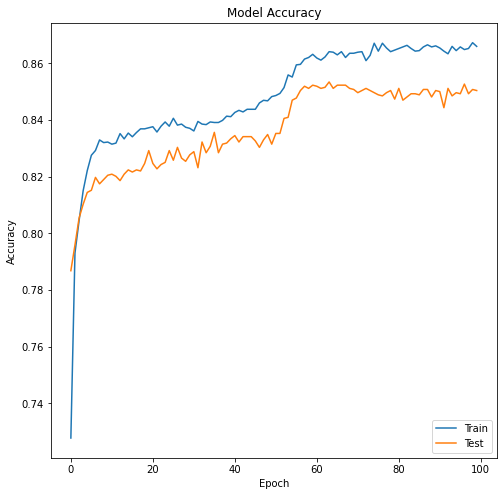

In [58]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

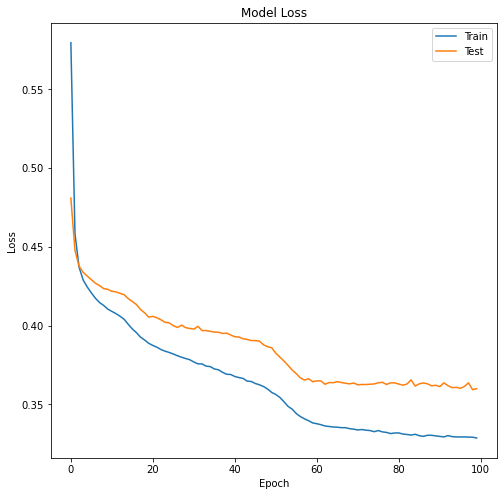

In [59]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [60]:
pred = model.predict(X_test)

In [61]:
pred

array([[0.28287578],
       [0.44886556],
       [0.09409863],
       ...,
       [0.11570248],
       [0.06302515],
       [0.26689726]], dtype=float32)

In [66]:
prediction = (pred>0.5)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [68]:
accuracy_score(prediction,y_test)

0.8615